# Modeling techniques for linear plant
## Case of first and second order models
### Ordinary Differentiel Equation (ODE) - Transfer Function (TF) - State Space (SS) 

In [1]:
import numpy as np

In [2]:
from scipy.integrate import odeint

In [3]:
from scipy.signal import impulse, step, TransferFunction as tf, StateSpace as ss

In [4]:
import matplotlib.pyplot as plt

In [6]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = ['fantasy']
plt.rcParams['font.fantasy'] = ['Comic Sans MS']

# CASE OF FIRST ORDER PLANT

$$\tau\dfrac{dy}{dt}+y(t) \;=\; k\times u(t),\qquad\text{where: y(t=0) = 0}$$

In [7]:
                  #########################
k, tau = 2.0, 0.5 # SIMULATION'S SETTINGS #
                  #########################

In [19]:
tstart, tstep, tstop = 0, .01, 7
tspan = np.arange(tstart, tstop, tstep)

In [20]:
tspan

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

**Numeric Integration: ODE**

***Euler forward approximation***

$$\tau\dfrac{y_{i+1}-y_i}{tstep}+y_i \;=\; k\times u_i,\qquad\text{where: $tstep$ denotes the sampling period}$$
Thus yields the following recurrent formula regarding the output $y$ at time-stamp $t\,=\,(i+1)tstep$
$$y_{i+1} \;=\; \left(1+\dfrac{tstep}{\tau}\right)y_i+k\dfrac{tstep}{\tau}u_i$$

In [27]:
ratio = tstep/tau
y, u = np.zeros_like(tspan), np.zeros_like(tspan)
for i in range(1, len(tspan)):
    u[i-1] = 1
    y[i] = (1-ratio)*y[i-1] + k*ratio*u[i-1]


findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'fantasy' not found because none of the following families were found: Comic Sans MS


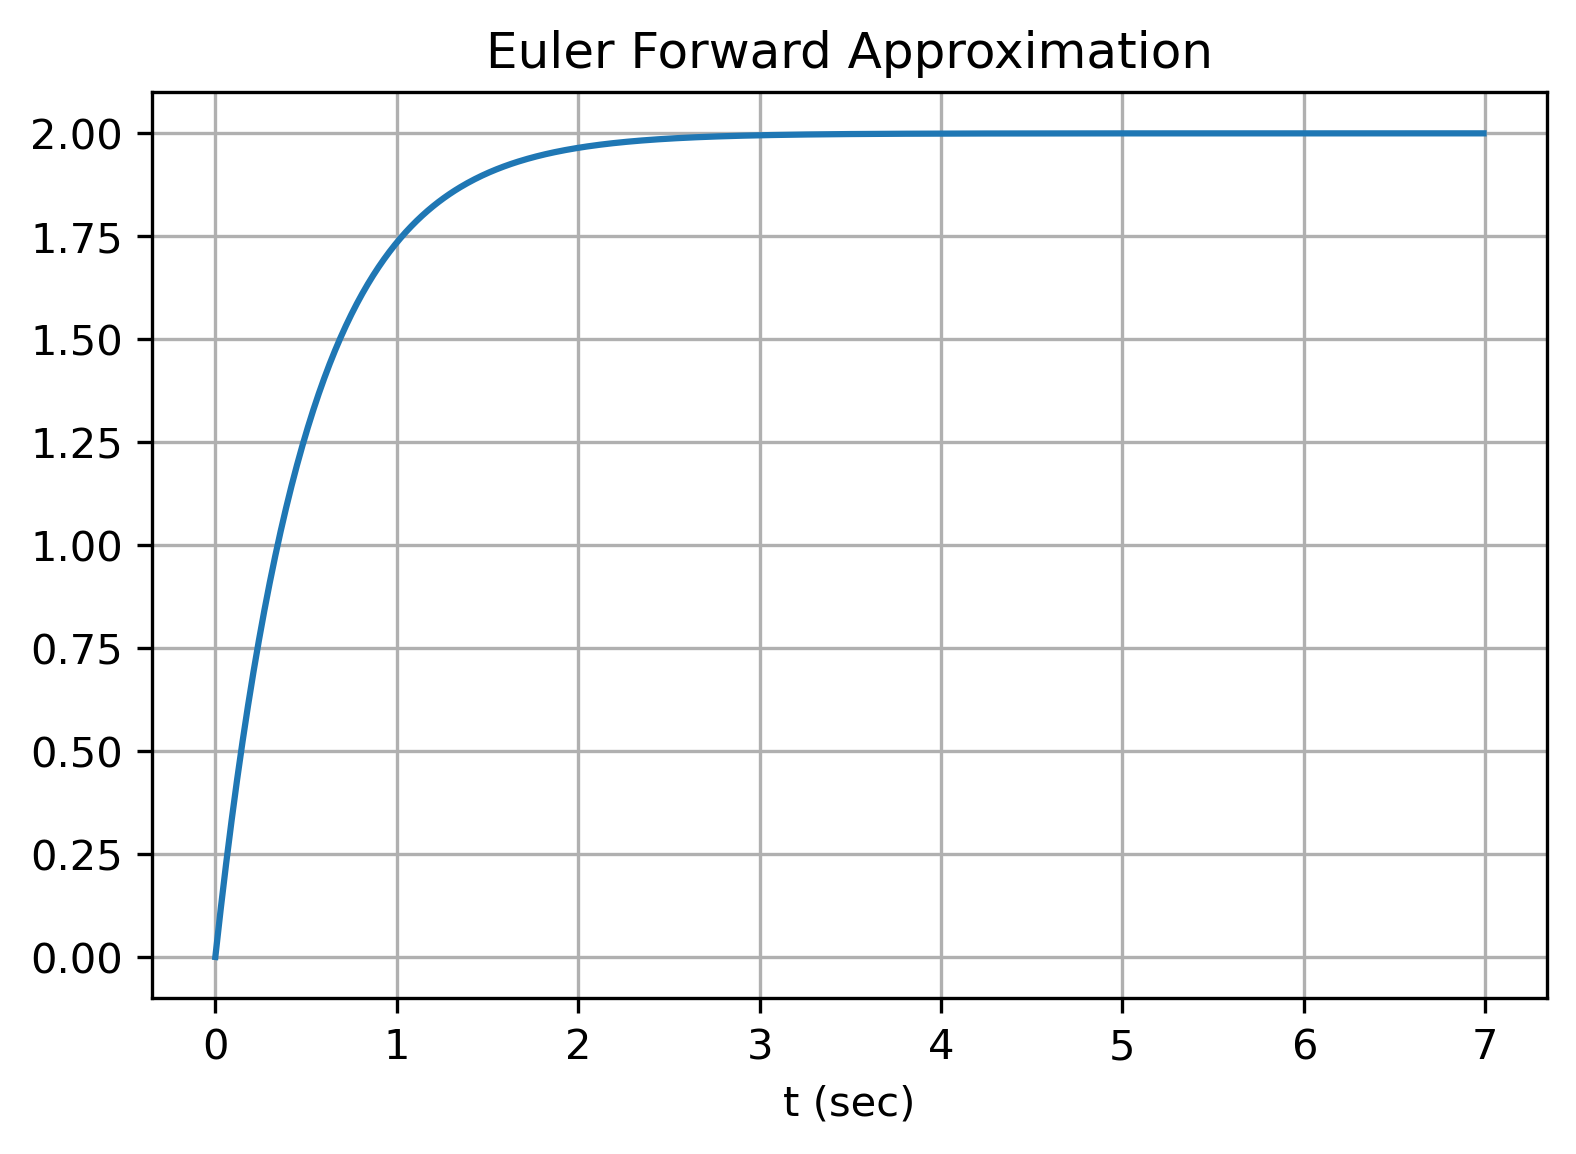

In [29]:
plt.plot(tspan, y)
plt.title('Euler Forward Approximation')
plt.xlabel('t (sec)')
plt.grid()

***Built-in method***

In [7]:
# 0.5*dy/dt + y(t) = 2*u(t),	y(t=0) = 0
def mySys(x, t):
	u = 1
	return 1/0.5*(-x + 2*u)

In [8]:
tspan = np.linspace(0.0, 7.0, 100)
y1 = odeint(mySys, 0, tspan)

**Transfer Function**

In [9]:
# 0.5*dy/dt + y(t) = 2*u(t),	y(t=0) = 0
hTF = tf([k], [tau, 1])
_, y2 = step(hTF, T=tspan)

**State Space**

In [10]:
# 0.5*dy/dt + y(t) = 2*u(t),	y(t=0) = 0
A, B, C, D = -1/tau, k/tau, 1, 0
hSS = ss(A, B, C, D)
_, y3 = step(hSS, T=tspan)

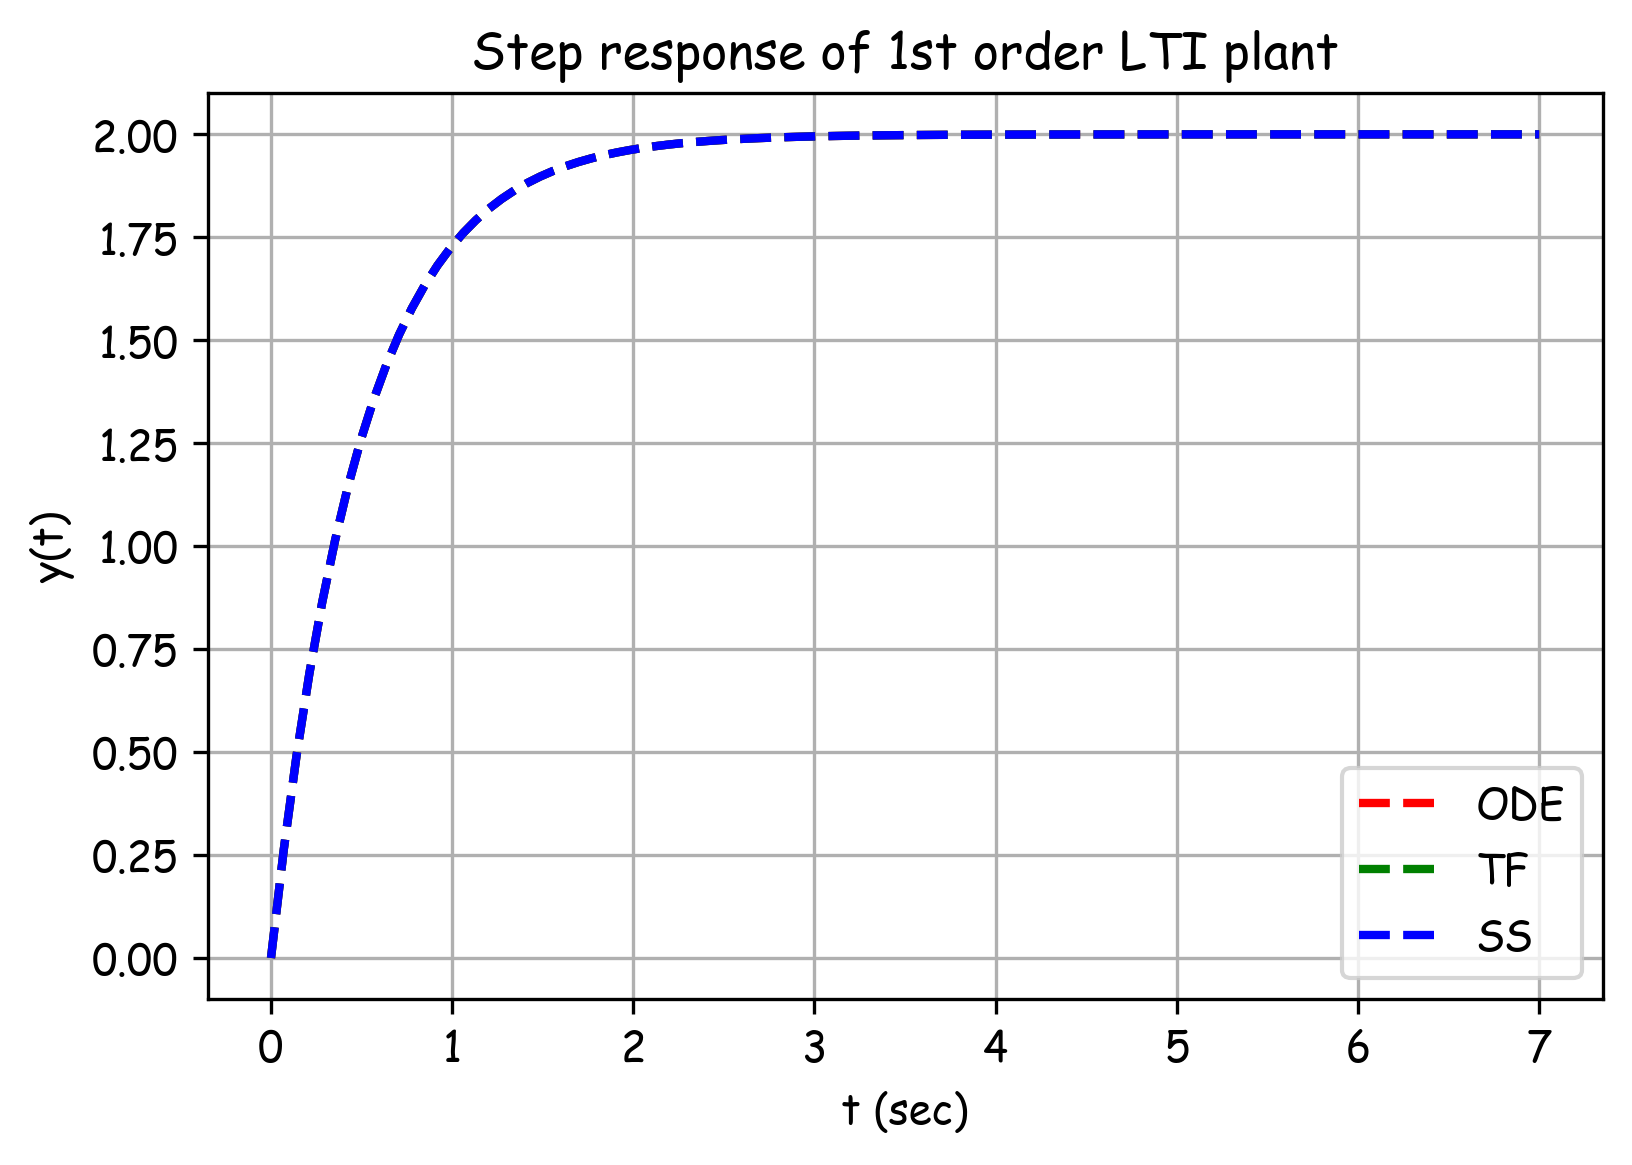

In [11]:
plt.plot(tspan, y1, 'r--', linewidth=2, label='ODE')
plt.plot(tspan, y2, 'g--', linewidth=2, label='TF')
plt.plot(tspan, y3, 'b--', linewidth=2, label='SS')

plt.title('Step response of 1st order LTI plant')
plt.xlabel('t (sec)')
plt.ylabel('y(t)')
plt.grid()
plt.legend(loc='best')
plt.show()

***Effects of $\tau$ on the system's dynamic***

In [12]:
tspan = np.linspace(0, 7, 1000)

*Using numerical integration: `odeint`*

In [13]:
def Sys1(y, t, K, tau, u0, delay):
    u = u0 * ( t>= delay ) # DELAYED INPUT
    doty = -1/tau*y + K/tau*u
    return doty

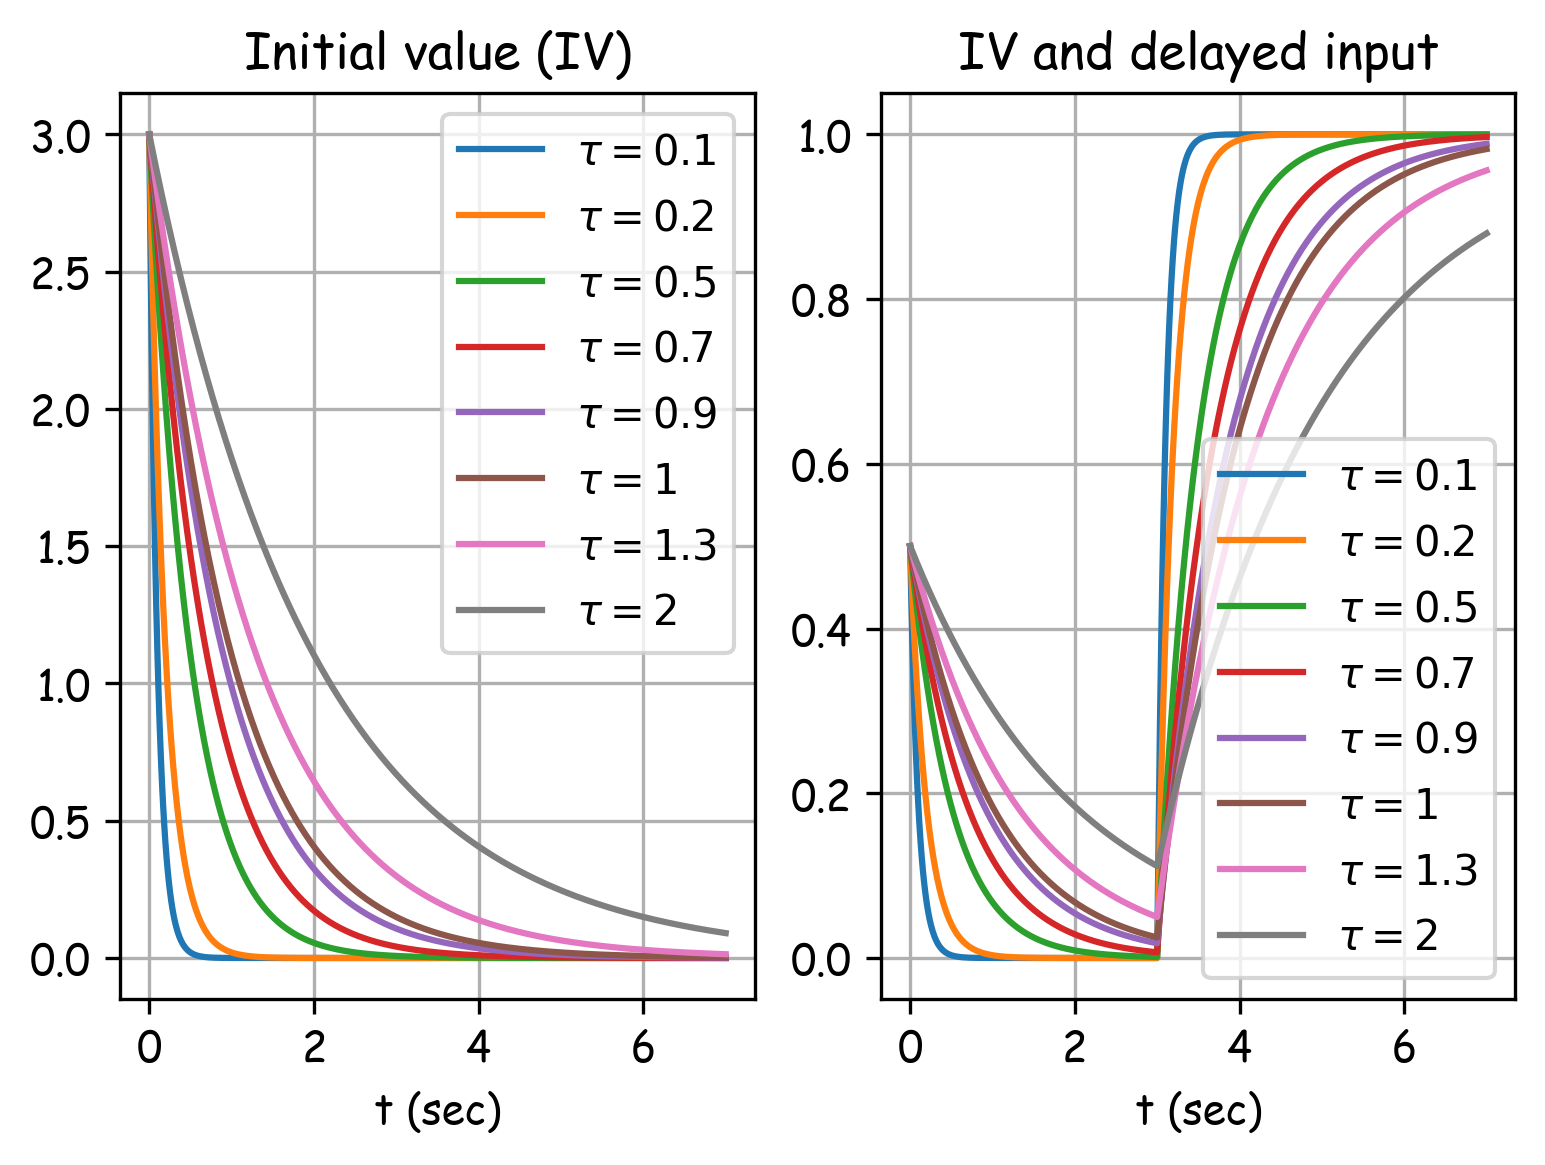

In [14]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.set(title='Initial value (IV)', xlabel='t (sec)')
ax2.set(title='IV and delayed input', xlabel='t (sec)')
ax1.grid(); ax2.grid()

for tau in [.1, .2, .5, .7, .9, 1, 1.3, 2]:
    y = odeint(Sys1, 3, tspan, args=(1, tau, 0, 0))
    ax1.plot(tspan, y, label=fr'$\tau={tau}$')
    y = odeint(Sys1, .5, tspan, args=(1, tau, 1, 3))
    ax2.plot(tspan, y, label=fr'$\tau={tau}$')

ax1.legend(); ax2.legend()

*Using transfer function: `tf`*

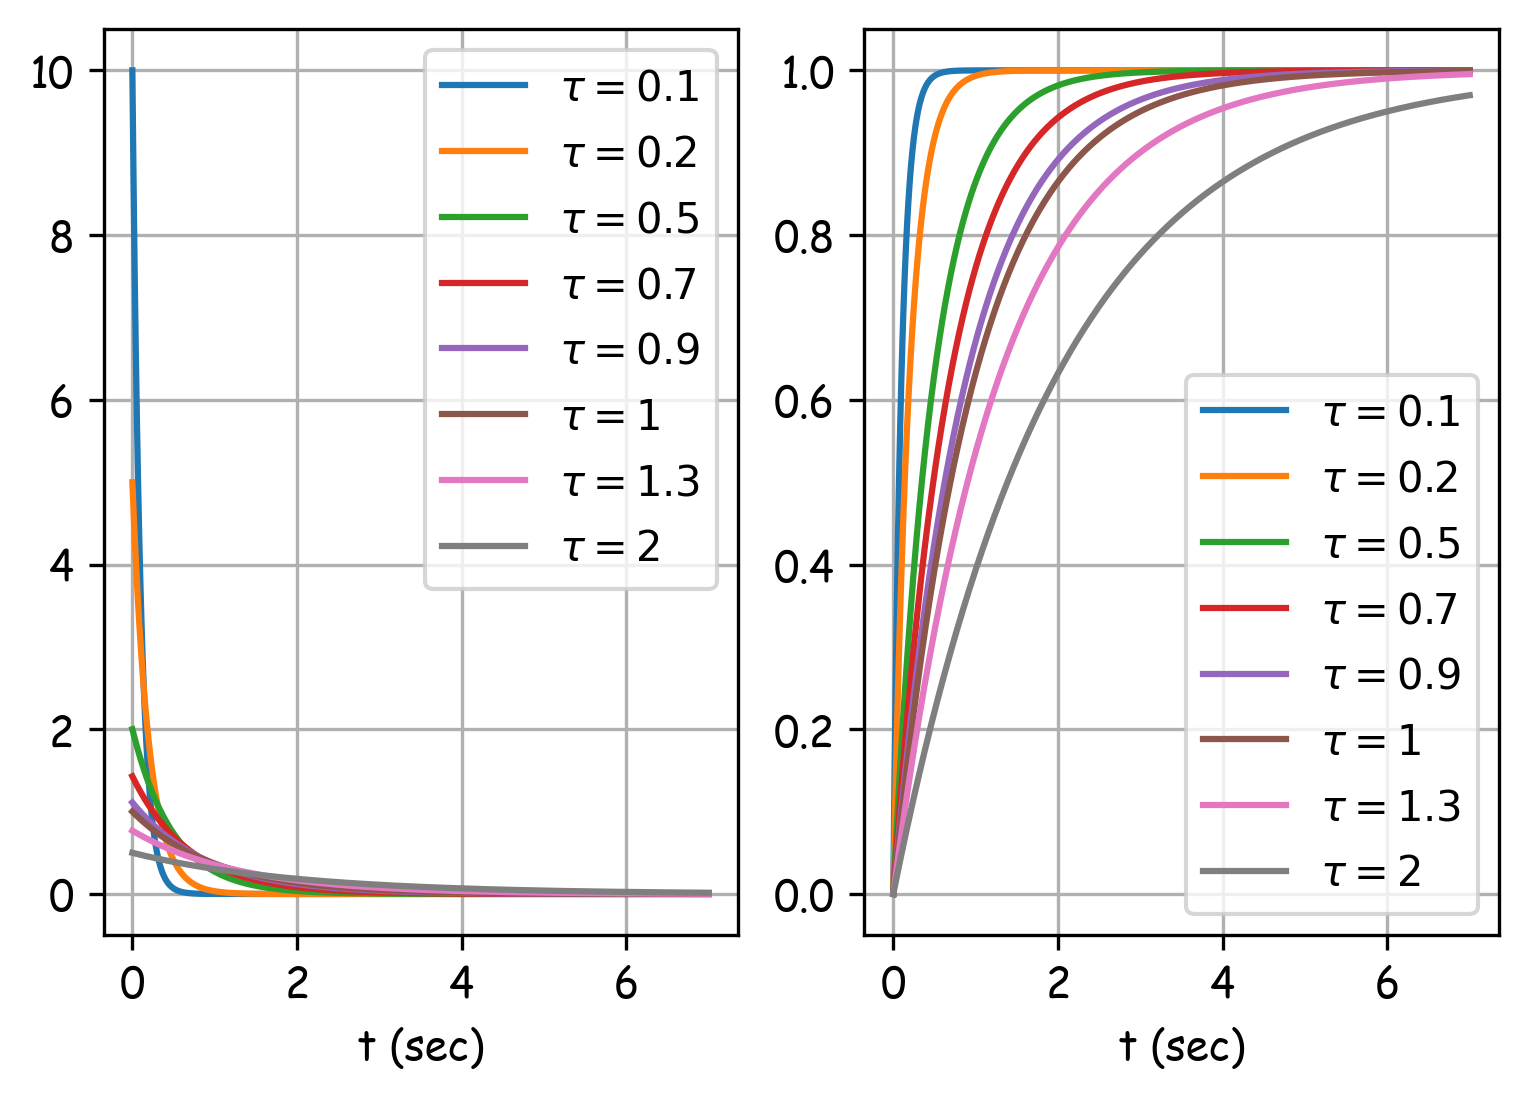

In [15]:
_, ax = plt.subplots(1, 2) # `ax` is a tuple containing two axes, aligned side by side horizontally.
ax[0].grid(); ax[1].grid() # `ax[i]` access the ith axis, i.e., `subplot(1, 2, i+1)`
ax[0].set(xlabel='t (sec)'); ax[1].set(xlabel='t (sec)')
for tau in [.1, .2, .5, .7, .9, 1, 1.3, 2]:
    # CONSTRUCT THE TF `h`
    h = tf([1], [tau, 1])
    # IMPULSE RESPONSE
    _, y = impulse(h, T=tspan)
    ax[0].plot(tspan, y, label=fr'$\tau={tau}$')
    # STEP RESPONSE
    _, y = step(h, T=tspan)
    ax[1].plot(tspan, y, label=fr'$\tau={tau}$')
    
ax[0].legend(); ax[1].legend()

*Using state space representation: `ss`*

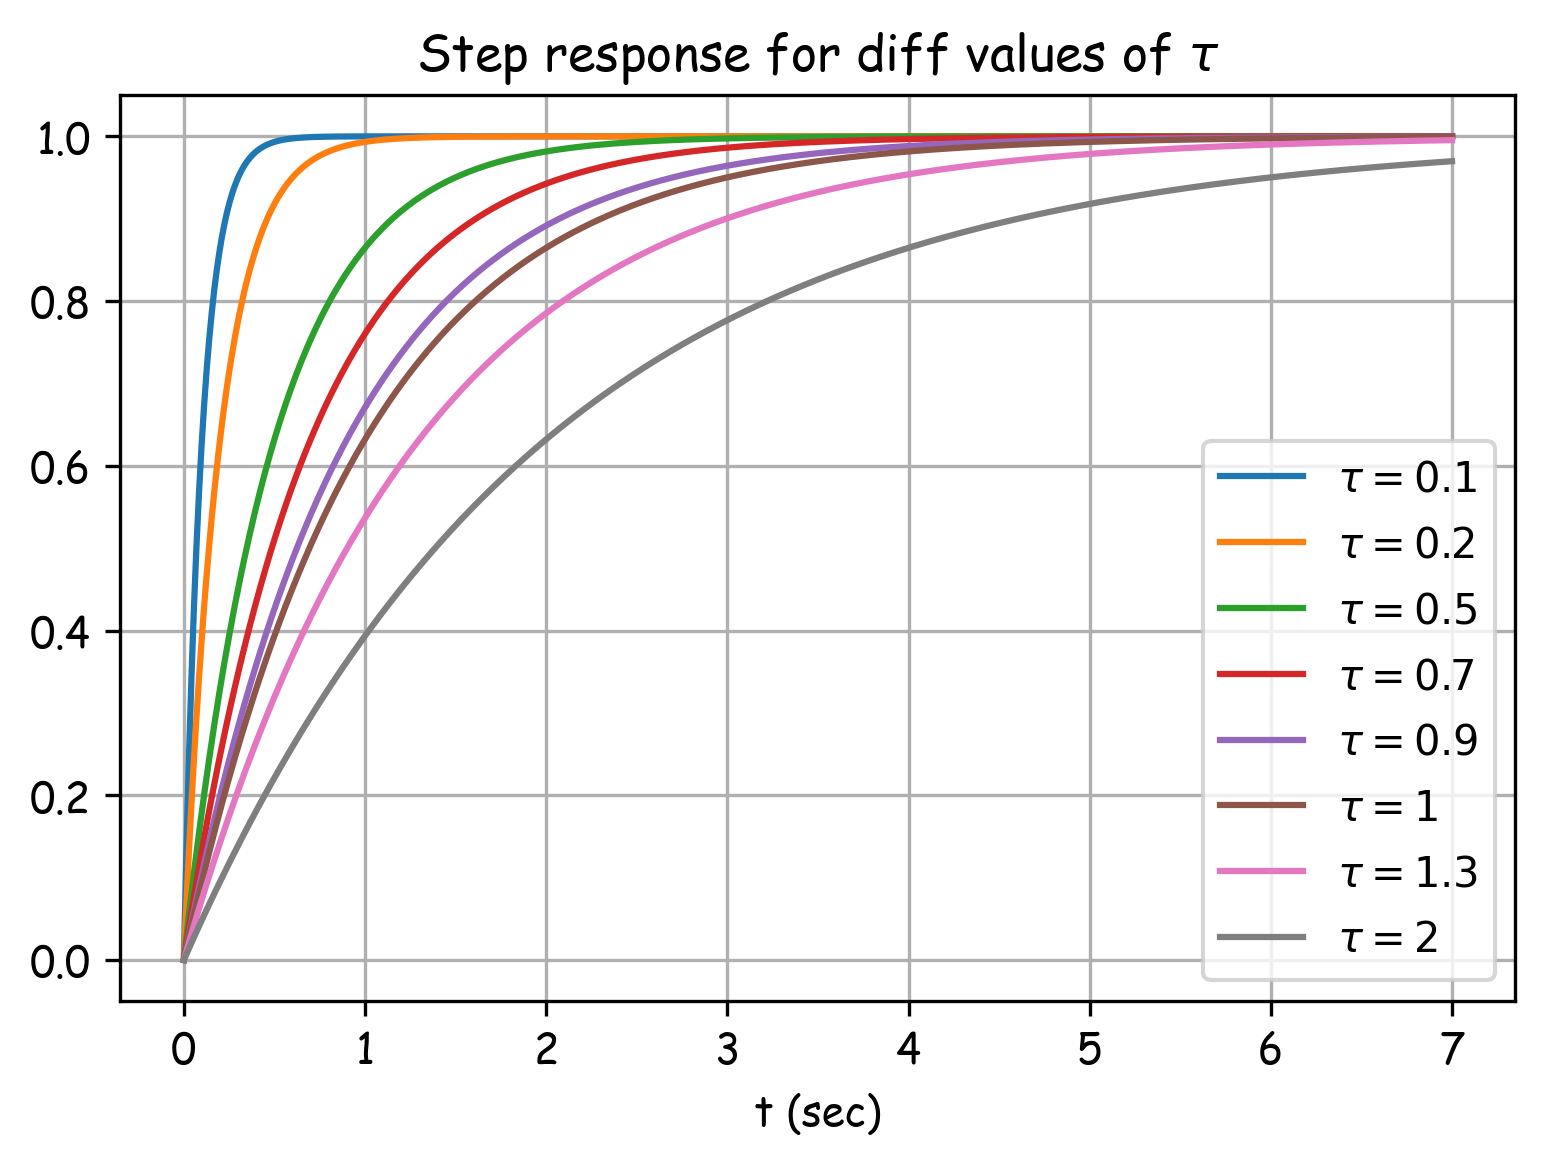

In [16]:
for tau in [.1, .2, .5, .7, .9, 1, 1.3, 2]:
    A, B, C, D = [-1/tau], [1/tau], [1], [0]
    hSS = ss(A, B, C, D)
    _, ySS = step(hSS, T=tspan)
    plt.plot(tspan, ySS, label=fr'$\tau={tau}$')

plt.title(r'Step response for diff values of $\tau$')
plt.xlabel('t (sec)')
plt.legend()
plt.grid()

# CASE OF SECOND ORDER PLANT

$$\dfrac{d^2y}{dt^2}+2\times m\times \omega_0\dfrac{dy}{dt}+\omega_{0}^{2} y(t) \;=\; k\omega_{0}^{2} u(t),\qquad\text{where: }y(0)=0 \;\&\; \dot{y}(0)=0$$

In [17]:
                    #########################
k, m, o = 1, 1, 1.5 # SIMULATION'S SETTINGS #
                    #########################

**Numeric Integration: ODE**

In [18]:
def mySys(x, t):
	u = 1
	dotx = [x[1], -o**2*x[0]-2*m*o*x[1] + k*o**2*u]
	return dotx

In [19]:
from scipy.integrate import odeint

In [20]:
tspan = np.linspace(0.0, 10.0, 100)
vect = odeint(mySys, [0, 0], tspan)
y1 = vect[:, 0]

**Transfer Function**

In [21]:
from scipy.signal import TransferFunction as tf

In [22]:
hTF = tf([k*o**2], [1, 2*m*o, o**2])
_, y2 = step(hTF, T=tspan)

**State Space**

In [23]:
from scipy.signal import StateSpace as ss

In [24]:
A = np.array([[0, 1], [-o**2, -2*m*o]])
B = np.array([[0], [k*o**2]])
C = np.array([[1, 0]])
D = np.array([[0]])

hSS = ss(A, B, C, D)
_, y3 = step(hSS, T=tspan)

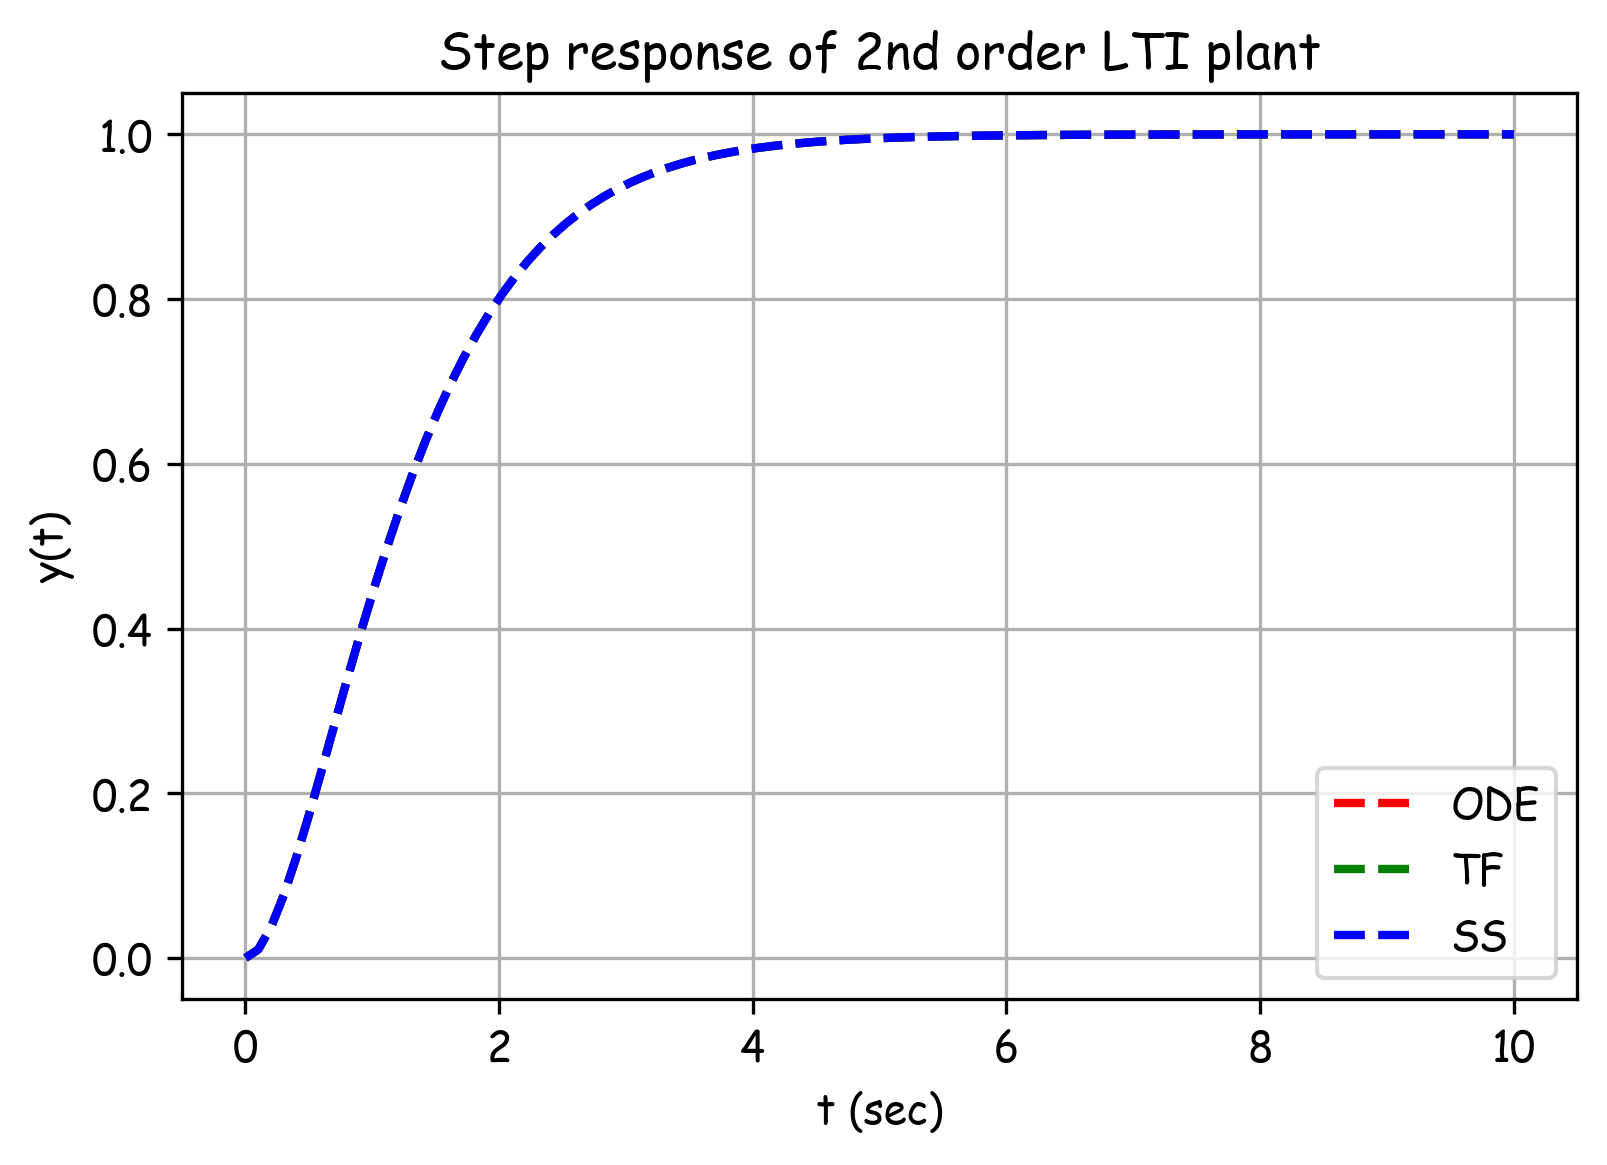

In [25]:
plt.plot(tspan, y1, 'r--', linewidth=2, label='ODE')
plt.plot(tspan, y2, 'g--', linewidth=2, label='TF')
plt.plot(tspan, y3, 'b--', linewidth=2, label='SS')

plt.title('Step response of 2nd order LTI plant')
plt.xlabel('t (sec)')
plt.ylabel('y(t)')
plt.legend(loc='lower right')
plt.grid()

***Effects of some parameters, namely $\zeta$ and $\omega_0$, on the system's dynamic***

In [26]:
tspan = np.linspace(0, 25, 100)

*Effects $\zeta$*

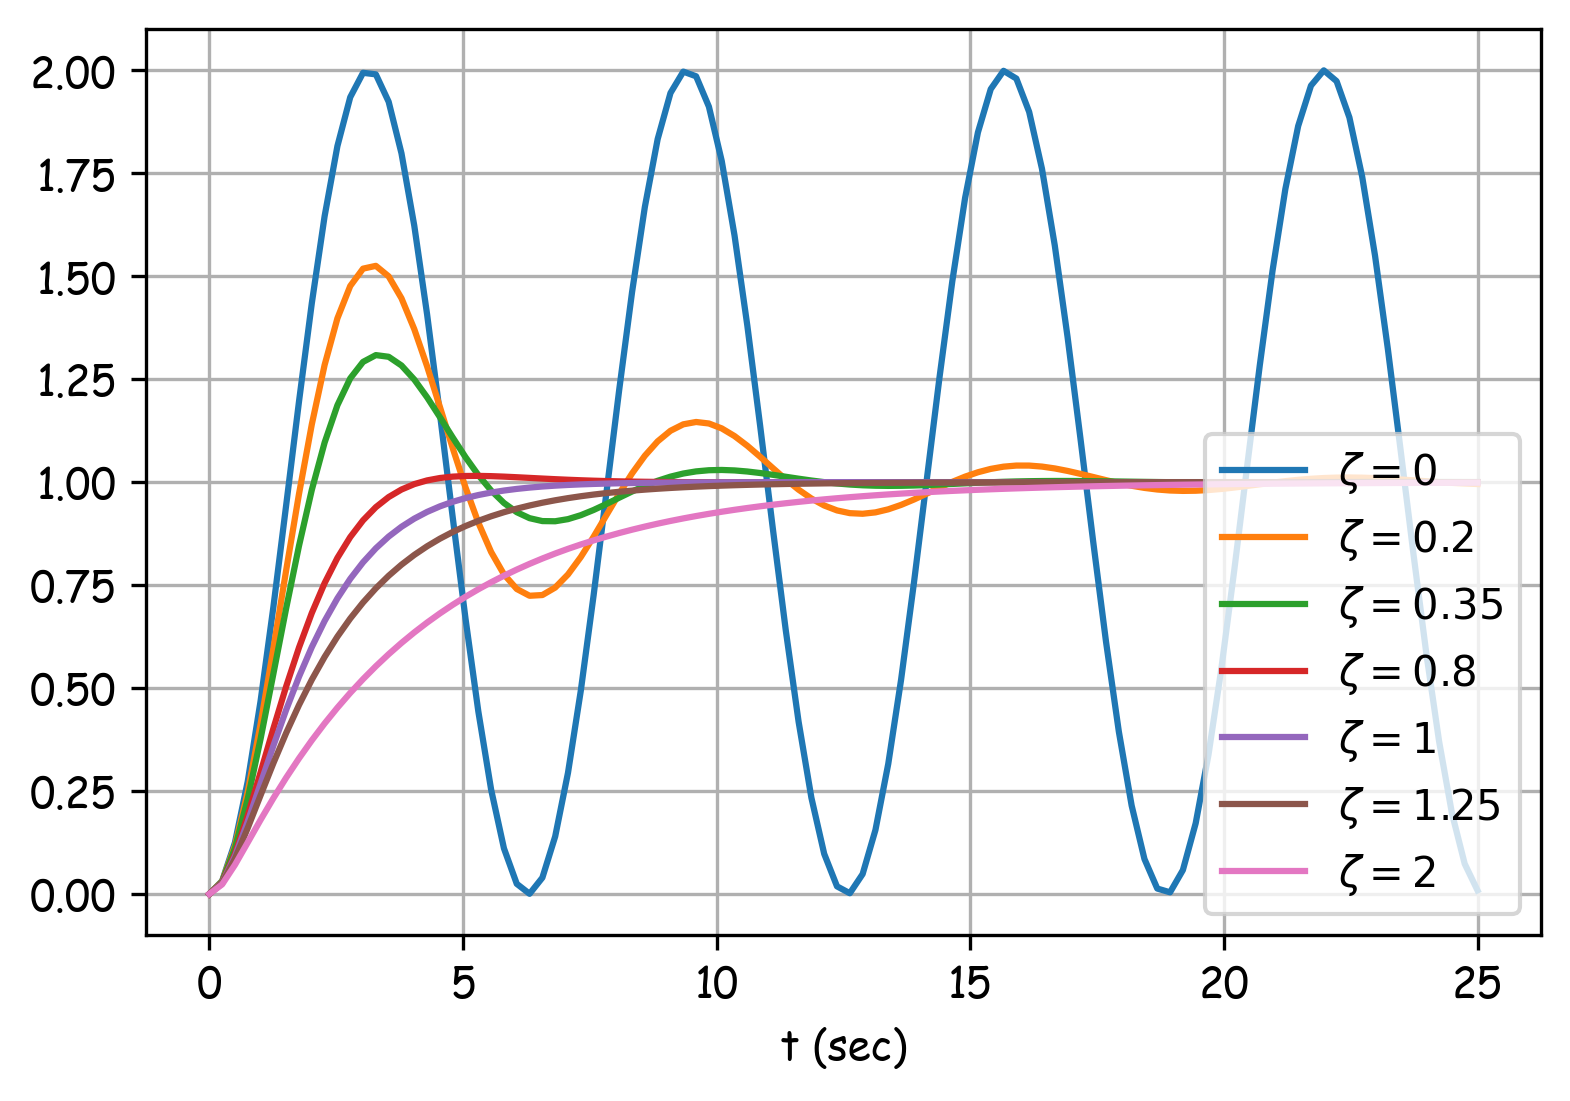

In [27]:
C = np.array([[1, 0]])
D = np.array([[0]])
k, o = 1, 1.0
for m in [0, .2, .35, .8, 1, 1.25, 2]:
    A = np.array([[0, 1], [-o**2, -2*m*o]])
    B = np.array([[0], [k*o**2]])
    hSS = ss(A, B, C, D)
    _, ySS = step(hSS, T=tspan)
    plt.plot(tspan, ySS, label=fr'$\zeta={m}$')
    
plt.xlabel('t (sec)')
plt.legend(loc='lower right')
plt.grid()

*Effects of $\omega_0$*

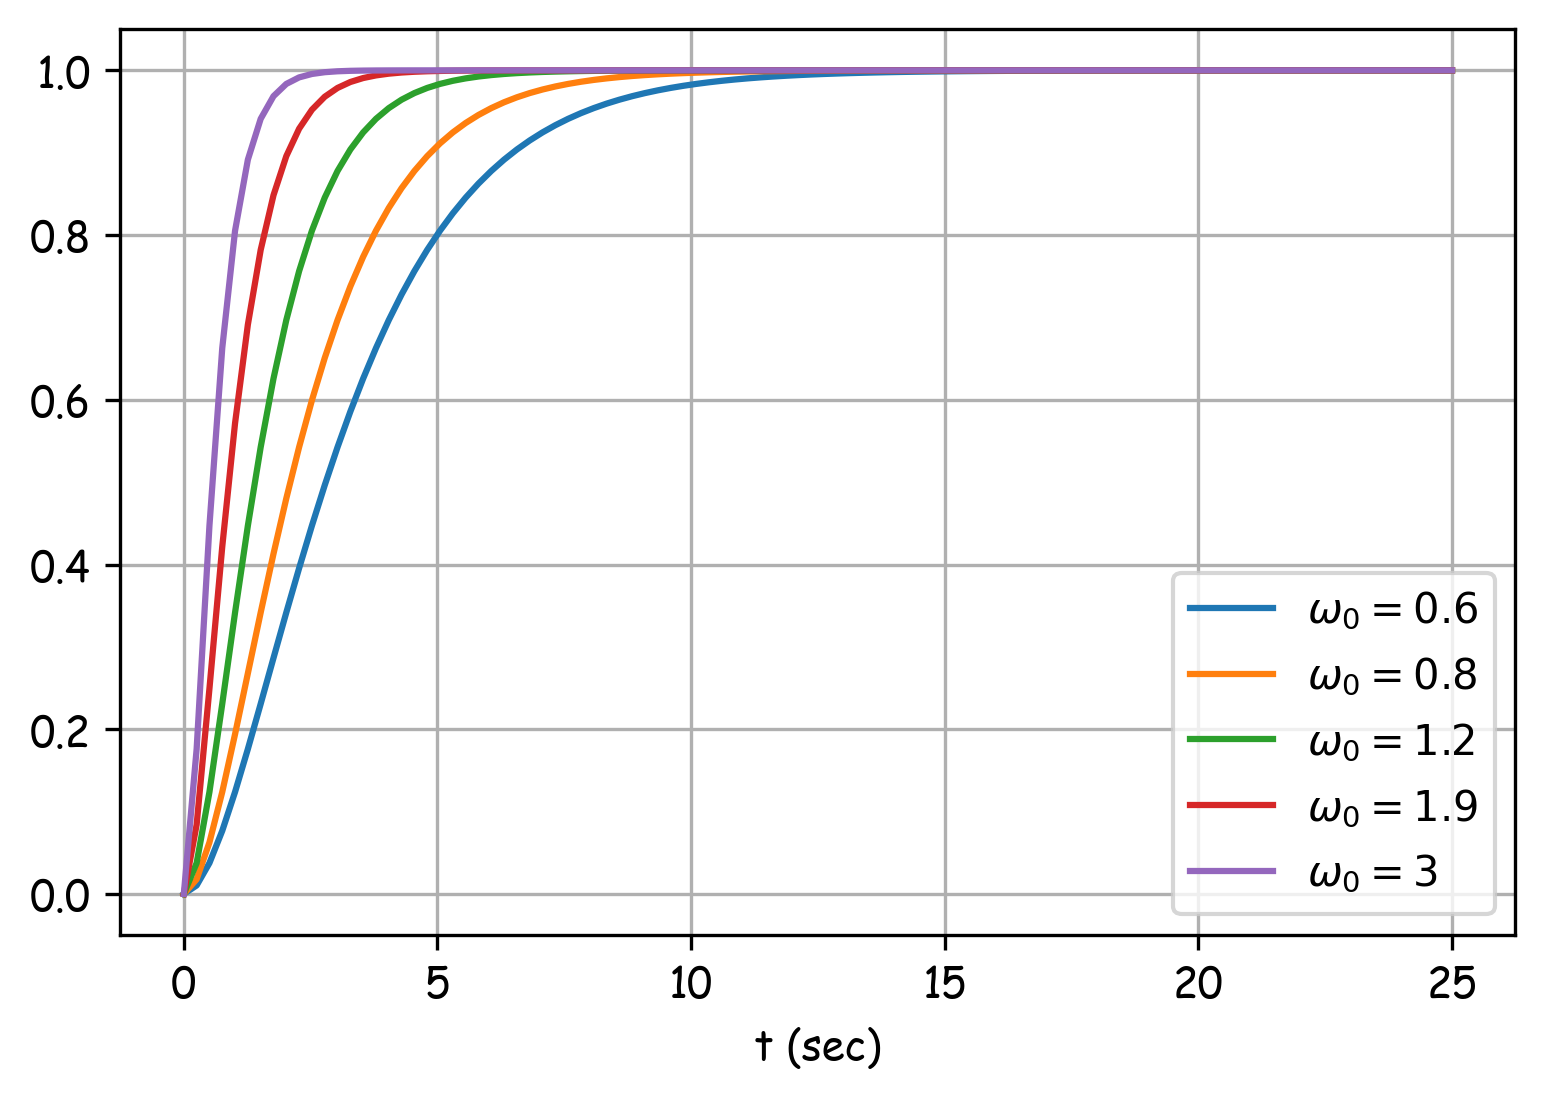

In [28]:
C = np.array([1, 0])
D = np.array([0])

K, m = 1, 1.
for o in [.6, .8, 1.2, 1.9, 3]:
    A = np.array([[0, 1], [-o**2, -2*m*o]])
    B = np.array([[0], [k*o**2]])
    h = ss(A, B, C, D)
    _, y = step(h, T=tspan)
    plt.plot(tspan, y, label=fr'$\omega_0={o}$')

plt.xlabel('t (sec)')
plt.legend()
plt.grid()
